#  Проект Основы машинного обучения
  Прогнозирование оттока клиентов фитнесс-центра на основе анализа данных 

 Задача — провести анализ и подготовить план действий по удержанию клиентов. 
    
-научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

-сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

-проанализировать основные признаки, наиболее сильно влияющие на отток;

-разработать рекомендации по повышению качества работы с клиентами


  ## Описание данных
Набор данных включает следующие поля:
    
    
Данные клиента за предыдущий до проверки факта оттока месяц:
    
'gender' — пол;

'Near_Location' — проживание или работа в районе, где находится фитнес-центр;

'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

'Phone' — наличие контактного телефона;

'Age' — возраст;

'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    
    
'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);

'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);

'Group_visits' — факт посещения групповых занятий;

'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;

'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;

'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
    
'Churn' — факт оттока в текущем месяце.

    
    
    

##  Изучение общей информации о данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import itertools

import warnings

In [2]:
# открываем файл
df = pd.read_csv('/datasets/gym_churn.csv') 

In [3]:
# общая информация  и первые 10 строк таблицы:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
#подсчет явных дубликатов
display(df.duplicated().sum())

0

Пропуски в данных и дубликаты отсутствуют 

## Исследовательский анализ данных (EDA)

In [5]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
#средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался методом .groupby()
df.groupby(['Churn']).mean().T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


 очевидно присутствуют две группы признаков качественные( в основном бинарные 0 или 1 )  или колличественные определим их   

In [7]:
# выделим  признаки
feature_bi = []
feature_quantity = []
for feature in df.columns.values:
    if df[feature].max() == 1:
        feature_bi.append(feature)
    else:
        feature_quantity.append(feature)
print(feature_bi)
print(feature_quantity)


['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn']
['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']


In [8]:
# сводная таблица оттока
df_churn= df.pivot_table(index=['Churn'], values=df.columns, aggfunc='mean').reset_index().T

display(df_churn.head(10))

,0,1
Churn,0.000000,1.000000
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Avg_class_frequency_current_month,2.027882,1.044546
Avg_class_frequency_total,2.024876,1.474995
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Lifetime,4.711807,0.990575
Month_to_end_contract,5.283089,1.662582
Near_Location,0.873086,0.768143


In [9]:
df_churn_1= df.query('Churn == 1')
df_churn_1

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,1,1,0,0,1,1,0,24,135.395712,1.0,0,1.390251,0.789321,1
3984,1,1,0,0,1,6,1,22,101.107544,6.0,2,1.377860,0.343915,1
3986,0,1,1,1,1,1,1,34,226.804845,1.0,0,1.399529,0.304130,1
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597,1


In [10]:
df_churn_0= df.query('Churn == 0')
df_churn_0

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,0,1,1,0,1,1,0,33,231.778628,1.0,3,1.418791,1.450442,0
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток). 


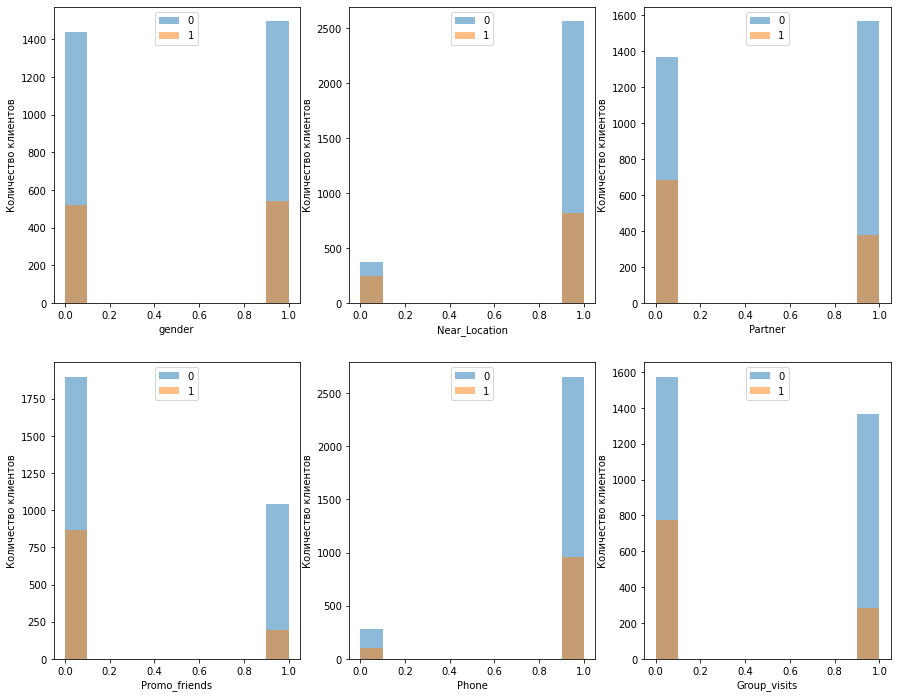

In [11]:
# визуализируем отличия для бинарных признаков
plt.figure(figsize=(15, 12))
for i in range(len(feature_bi)-1):   
    ax = plt.subplot(2, 3, i+1)
    ax.hist(df_churn_0[feature_bi[i]], alpha=0.5, label='0')
    ax.hist(df_churn_1[feature_bi[i]], alpha=0.5, label='1')
    plt.xlabel(feature_bi[i])
    plt.ylabel('Количество клиентов')
    plt.legend(loc='upper center')
plt.show()

<div class="alert alert-block alert-warning">
<b> 
    
    По графикам бинарных признаков  наиболее преданные клиенты живут чаще рядом с фитнес-центром,их работодатели партнеры клуба, они чаще привлечены промоакциями и чаще посещают групповые тренировки , тогда как попавшие в отток наоборот  

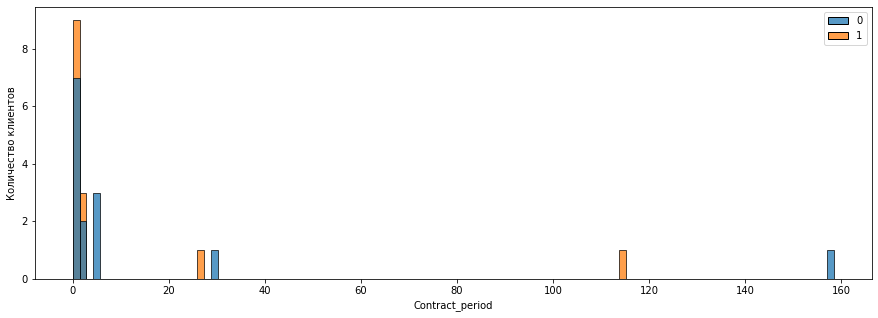

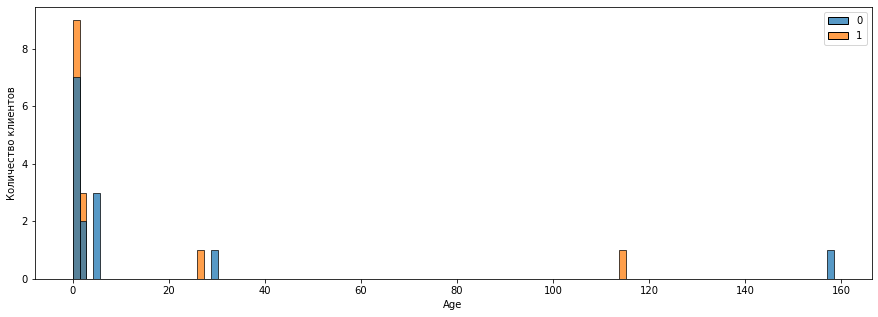

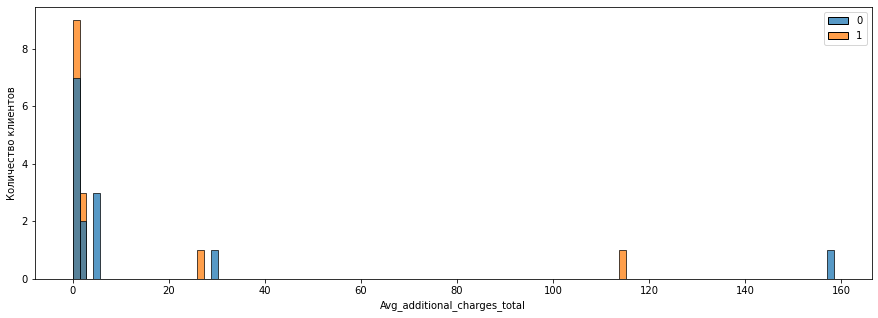

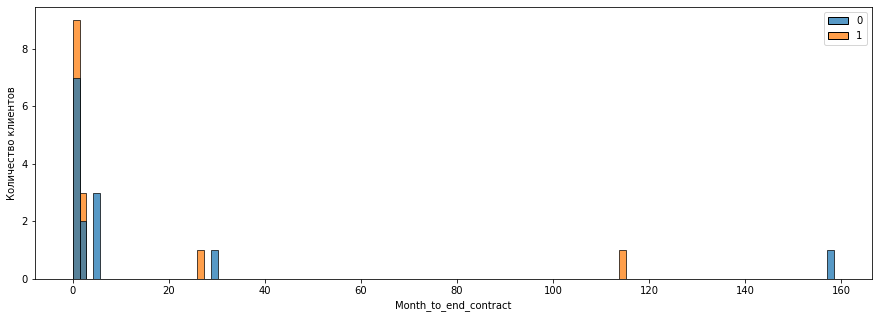

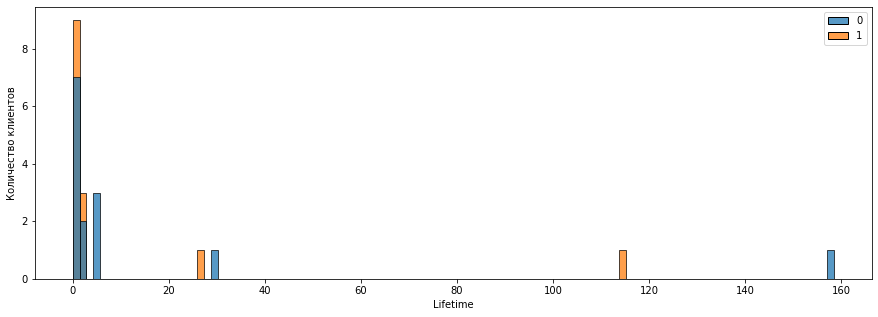

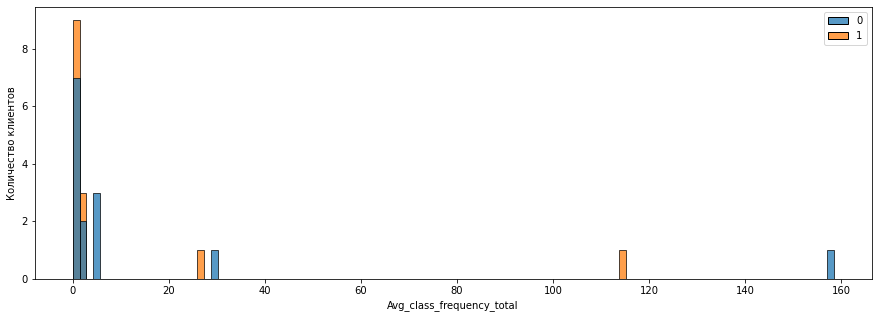

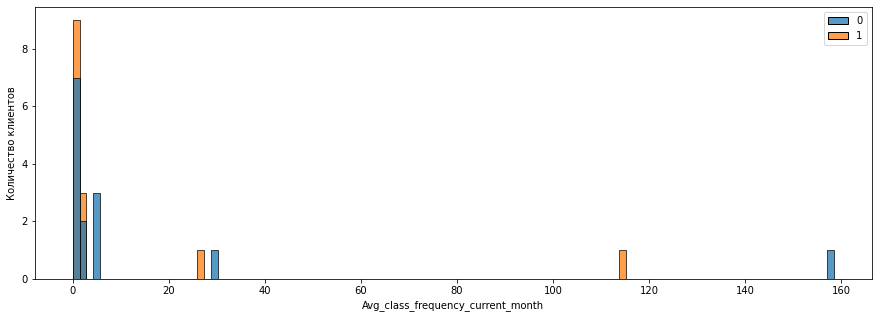

In [12]:
# визуализируем отличия колличественных признаков по объединенной таблице оттока
for feature in feature_quantity:
    plt.figure(figsize=(15, 5))
    sns.histplot( data=df_churn)

    plt.xlabel(feature)
    plt.ylabel('Количество клиентов')
    plt.show()


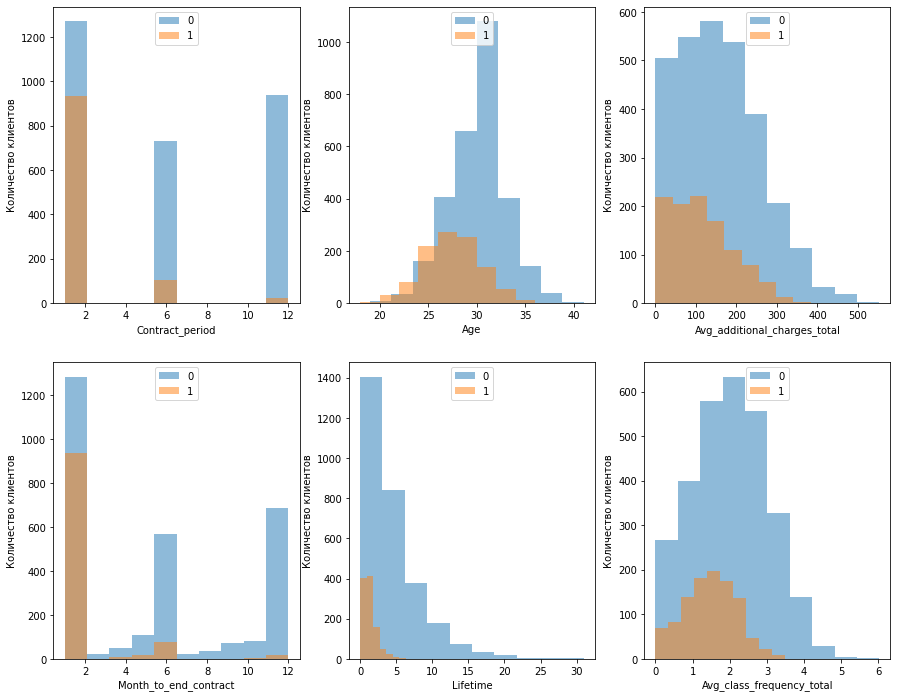

In [13]:
plt.figure(figsize=(15, 12))
for i in range(len(feature_quantity )-1):   
    ax = plt.subplot(2, 3, i+1)
    ax.hist(df_churn_0[feature_quantity [i]], alpha=0.5, label='0')
    ax.hist(df_churn_1[feature_quantity [i]], alpha=0.5, label='1')
    plt.xlabel(feature_quantity [i])
    plt.ylabel('Количество клиентов')
    plt.legend(loc='upper center')
plt.show()

<div class="alert alert-block alert-warning">
<b> 
    
    В  распределении  колличественных признаков очевидно, что  чаще попадают в отток клиенты, которые не ходили в текущий месяц, купили абонемент  на 1 месяц, у которых остался всего месяц  до конца абонемента, кто пришел впервые не более 3 месяцев назад.  Также попавшие в отток реже посещают тренировки в целом и в среднем на три года  моложе 

In [14]:
#матрица корреляций
df.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


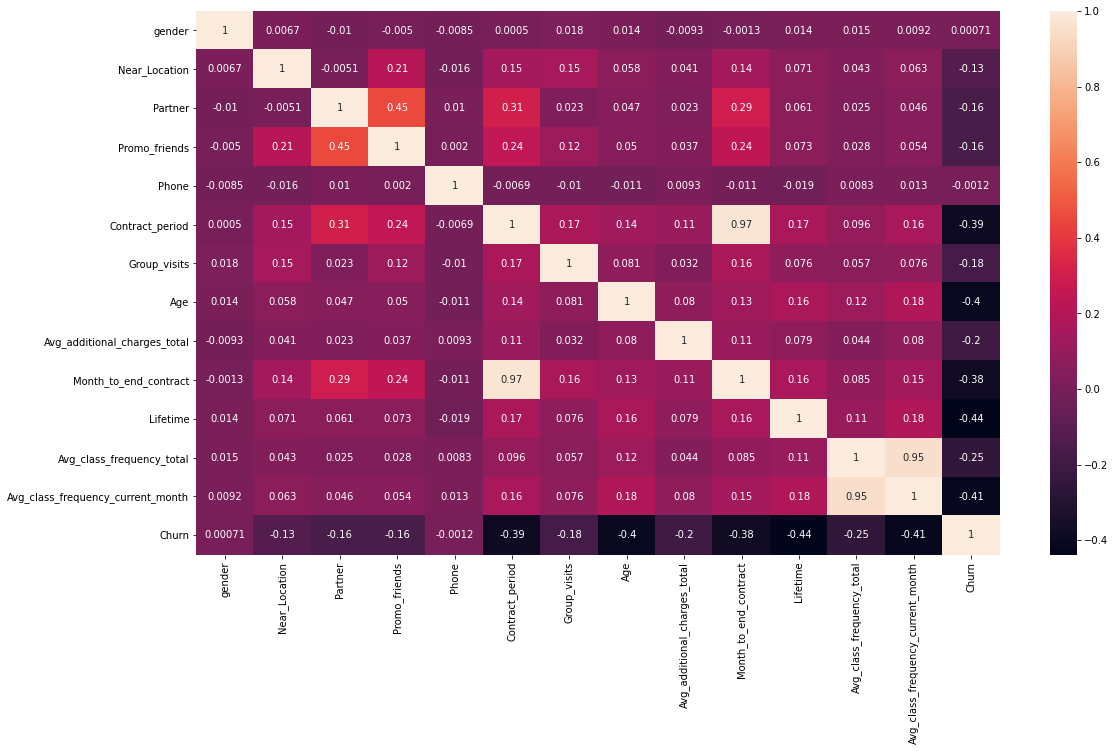

In [15]:
# тепловая карта матрицы корреляции
plt.figure(figsize=(18, 10))

sns.heatmap(df.corr(), annot=True)
plt.show()

Наиболее сильная корреляция заметна между Month_to_end_contract и Contract_period это возможно т.к.  для абонементов на 1 месяц это одно и то же число.


Сильная корреляция  между Avg_class_frequency_current_month и Avg_class_frequency_total.Корреляция демонстрирует, что  клиенты посещают фитнесс-центр стабильно на протяжении  действия абонемента. 



Сильной прямой корреляции  оттока нет ни с каким признаком.

 ## Модель прогнозирования оттока клиентов

 Строим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

In [16]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('Churn', axis=1)
y = df['Churn']



In [17]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

 две выборки под признаки и целевой признак


In [18]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))


In [19]:

# обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)





# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0)# Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions =  rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities, 
    title='Метрики для модели случайного леса:'
)


Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83


Величины метрик для  логистической регрессии и случайного леса очень хорошие , но на несколько процентных пунктов логистическая регрессия  все же превосходит

Признаем лучшей моделью на основании метрик  логистическую регрессию.

 ## Кластеризация клиентов

### Иерархическая кластеризация

Стандартизируем данные.


In [20]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

Строим  матрицу расстояний функцией linkage() на стандартизованной матрице признаков и рисуем  дендрограмму

In [21]:
linked = linkage(X_sc, method = 'ward') 

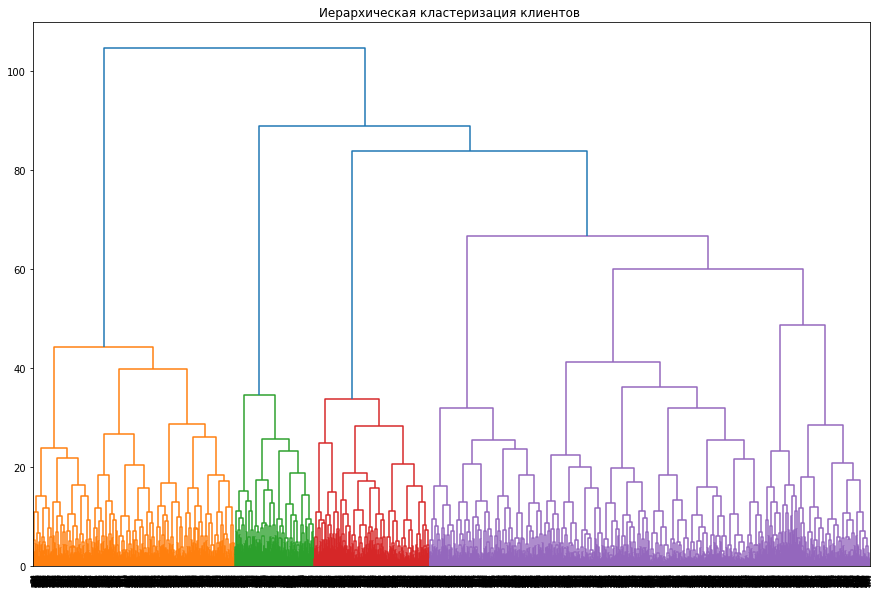

In [22]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов ')
plt.show() 

На основании цветов графика оптимальное кол-во кластеров равно 4 

### Модель кластеризации на основании алгоритма K-Means Заданное число кластеров n=5

In [23]:
# задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата

km = KMeans(n_clusters=5, random_state=0)
# применяем алгоритм к данным и формируем вектор кластеров
labels = km.fit_predict(X_sc)

In [24]:
# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] =labels

# выводим статистику по средним значениям наших признаков по кластеру
display(df.groupby('cluster_km').mean().T)



cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
Near_Location,0.959406,0.862338,0.000000,1.000000,0.976134
Partner,0.783168,0.470130,0.463366,0.350238,0.356802
Promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
Phone,1.000000,0.000000,1.000000,1.000000,0.998807
Contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
Group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
Age,29.982178,29.301299,28.477228,28.167987,30.125298
Avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
Month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


#### Анализ кластеров
Самые лучшие показатели в кластере 0 и 4. 

В обоих кластерах клиенты в большинстве проживают рядом с фитнесс-центром ,чаще посещают групповые тренировки, самые высокие показатели Lifetime и числа посещений в неделю, как в общем за все время действия абонемента , так и в предыдущий месяц .Клиенты этих кластеров тратят больше денег и на сопутствующие услуги центра.

В первом кластере большее кол-во партнеров клуба,использований проморекомендаций от друзей ,самые длинные контракты,абонементы в большинстве открыты недавно. 

В кластере 3 самая большая доля оттока. Эти клиенты реже всего тренировались как в общем,так и в предыдущем месяце, меньше всех тратились на дополнительные услуги, и абонементы чаще всего покупали на месяц.


In [25]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()


countplot для качественных признаков  
    

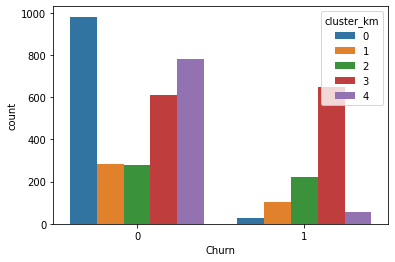

In [26]:
sns.countplot(data=df, x="Churn", hue="cluster_km")
plt.show() 

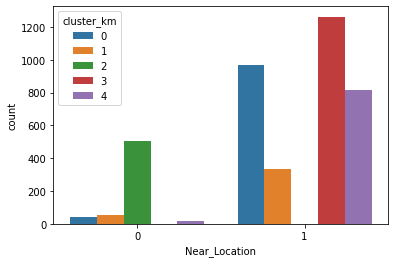

In [27]:
sns.countplot(data=df, x="Near_Location", hue="cluster_km")
plt.show() 

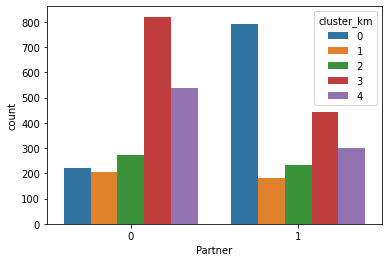

In [28]:
sns.countplot(data=df, x="Partner", hue="cluster_km")
plt.show()

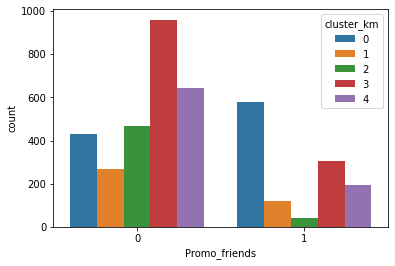

In [29]:
sns.countplot(data=df, x="Promo_friends", hue="cluster_km")
plt.show()

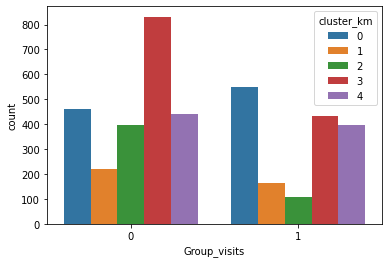

In [30]:
sns.countplot(data=df, x="Group_visits", hue="cluster_km")
plt.show()

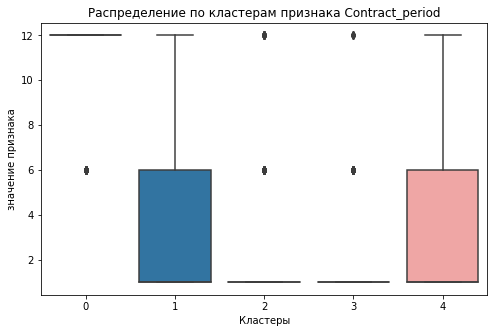

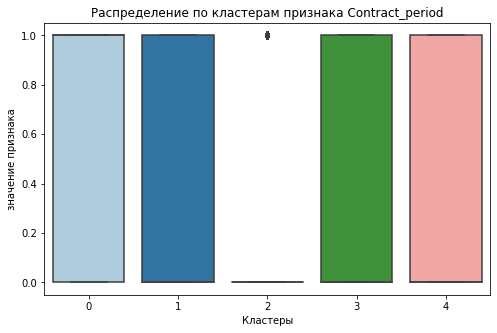

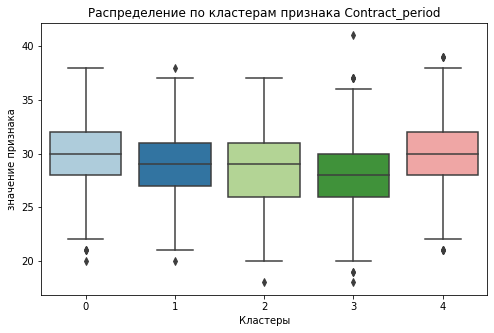

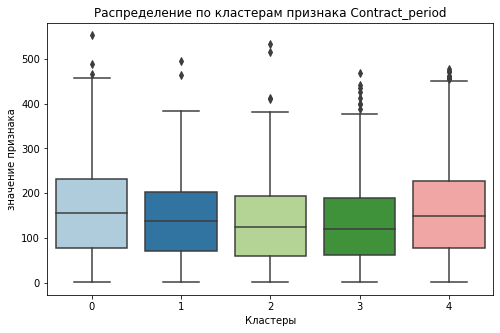

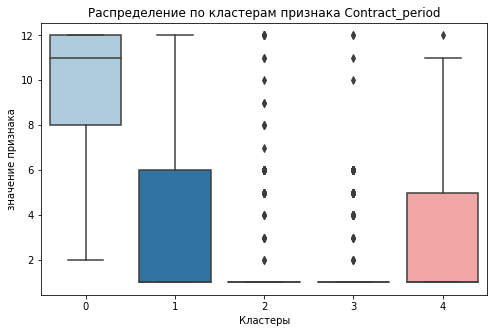

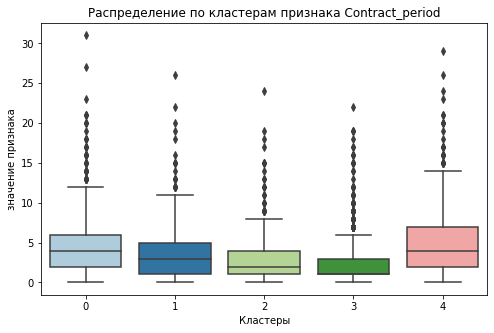

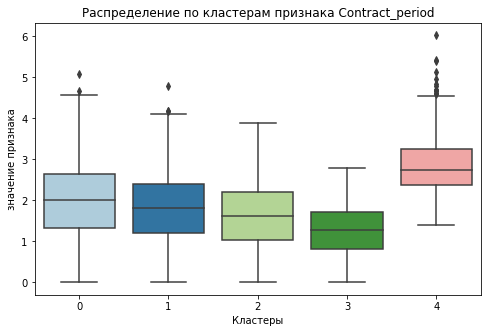

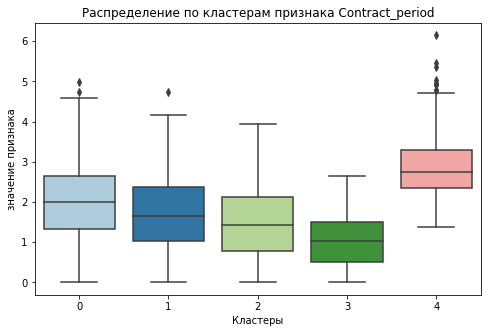

In [33]:
columns = ['Contract_period','Group_visits','Age','Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total',
'Avg_class_frequency_current_month']
num_cols = 0

for col in columns:
    plt.figure(figsize=(8, 5))
    plt.title("Распределение по кластерам признака " + columns[num_cols])
    sns.boxplot(x='cluster_km',y=col, data=df, palette='Paired')
    plt.xlabel('Кластеры')
    plt.ylabel('значение признака')
    plt.show()

## Выводы:

Проведен анализ анкет клиентов фитнес-клуба. На основании этих данных созданы  и обучены модели   прогнозирования оттока клиентов. Выделено  5 кластеров клиентов и проведен анализ основных признаков.

 Наиболее связанны с оттоком  следующие признаки:

 - удаленность клуба от места жительства клиента , живущие близко, реже   бросают занятия
 
 -  клиенты, работодатели которых партнеры  клуба бросают занятия реже.
 
 - общая и недельная  частота посещений - чем чаще человек ходит заниматься, тем выше вероятность, что он не бросит занятия
 - посещение групповых занятий - клиенты  формируют круг общения в центре и  бросают реже

 - покупка дополнительных услуг демонстрирует общую лояльность к фитнесс-центру, предоставляемые услуги нравятся.

 - длительность контракта  - купившие годовой абонемент  бросают реже
 
 - реже бросают клиенты более старшего возраста
 
Пол клиента, рекомендация от друга, наличие контактного номера телефона не показывают заметного влияния на отток.   

Рекомендации  отделу маркетинга для улучшения стратегии удержания клиентов:
  -
 - ввести  более выгодные условий для длительных абонементов ( полгода и год)
 
 
 - привлекательные долговременные условия контрактов и дополнительные скидки для партнеров клуба
 
 
 - дифференцированные абонементы посетителям групповых программ, например можно выдавать скидку постоянным посетителям групповых    занятий, так как  групповые занятия проходят по расписанию и  это будет формировать привычку  регулярно посещать 
   фитнесс-    центр.
 
 
 -  дополнить акцию "Promo_friends"введением  скидки клиенту друзья которого приобрели абонементы 
 



